# Lab 2.06 - Univariate Analysis

## Exercise 6 - Android Persistence

Import all necessary Python libraries and load the Android Persistence dataset from lab exercise 1.02.  Do not forget the conversion to categorical variables. Define an order in case of an ordinal variable.

In [ ]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns

In [30]:
ap = pd.read_csv('../data/android_persistence_cpu.csv', delimiter=';')
ap['PersistenceType'] = ap['PersistenceType'].astype('category')
size_order = ['Small', 'Medium', 'Large']
ap['DataSize'] = ap['DataSize'].astype(CategoricalDtype(categories=size_order, ordered=True))
ap

,Time,PersistenceType,DataSize
0,1.81,Sharedpreferences,Small
1,1.35,Sharedpreferences,Small
2,1.84,Sharedpreferences,Small
3,1.54,Sharedpreferences,Small
4,1.81,Sharedpreferences,Small
...,...,...,...
295,12.12,Realm,Large
296,10.85,Realm,Large
297,12.32,Realm,Large
298,12.04,Realm,Large


Visualise the variables `DataSize` and `PersistenceType` separately using a suitable chart type.

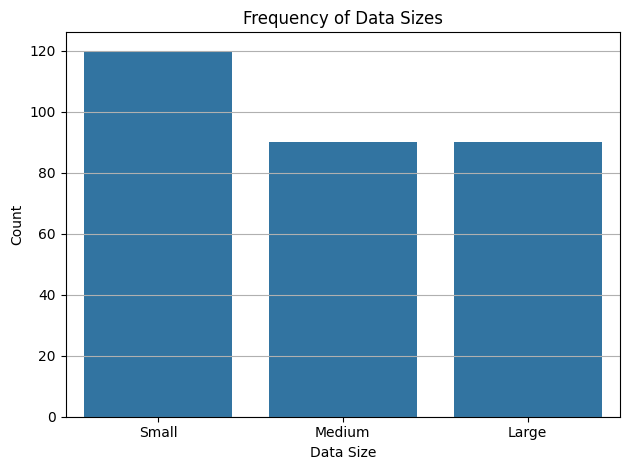

In [32]:
# Count plot for DataSize
sns.countplot(data=ap, x='DataSize', order=['Small', 'Medium', 'Large'])

plt.title('Frequency of Data Sizes')
plt.xlabel('Data Size')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

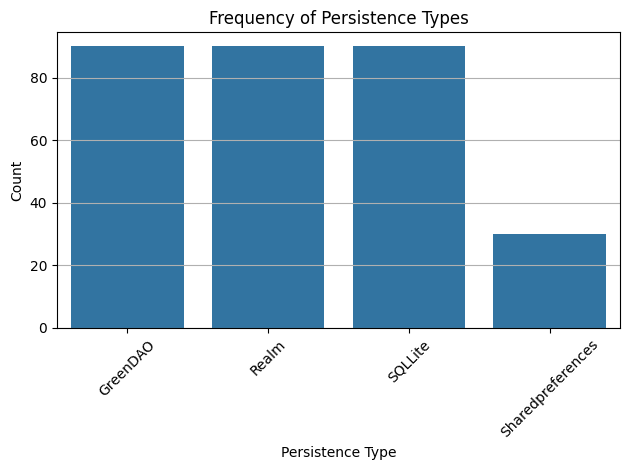

In [33]:
# Count plot for PersistenceType
sns.countplot(data=ap, x='PersistenceType')

plt.title('Frequency of Persistence Types')
plt.xlabel('Persistence Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

How often does each combination of `DataSize` and `PersistenceType` occur? Show the frequencies of `PersistenceType` (parameter `hue`), grouped according to `DataSize` (parameter `x`). Try it the other way round too!

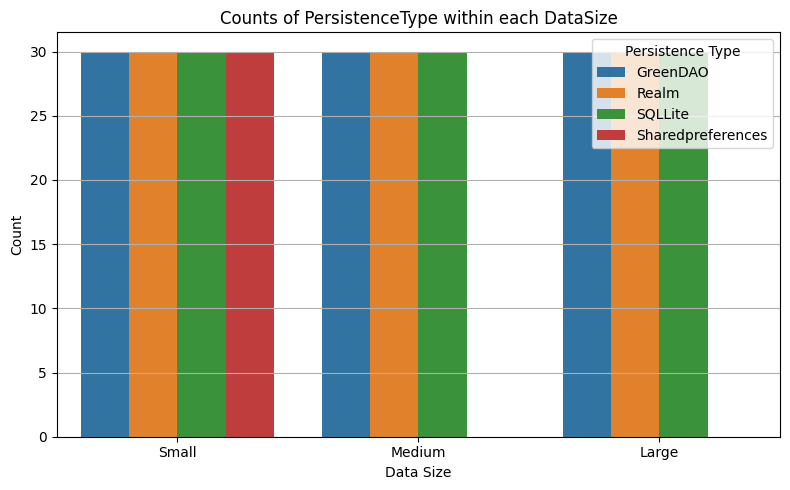

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=ap, x='DataSize', hue='PersistenceType', order=['Small', 'Medium', 'Large'])

plt.title('Counts of PersistenceType within each DataSize')
plt.xlabel('Data Size')
plt.ylabel('Count')
plt.legend(title='Persistence Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [38]:
pd.crosstab(ap['PersistenceType'], ap['DataSize'])

DataSize,Small,Medium,Large
PersistenceType,,,
GreenDAO,30,30,30
Realm,30,30,30
SQLLite,30,30,30
Sharedpreferences,30,0,0


Visualise the variable `Time` with a boxplot, each time with more detail. Do you notice how you get a better view of the data each time you do this?

- First over the entire dataset (parameter `x`)
- Then grouped according to `DataSize` (parameter `y`)
- Finally, split it according to `PersistenceType` (parameter `hue`)

<Axes: xlabel='Time', ylabel='DataSize'>

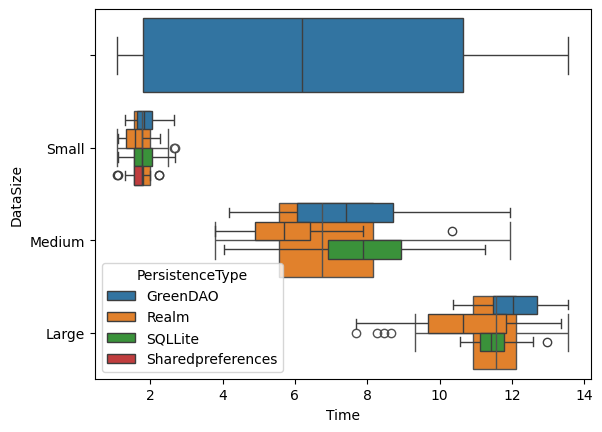

In [67]:
# ap.boxplot(column='Time', vert=False, grid=True)
# ap.boxplot(column='Time', by='DataSize', vert=False, grid=True)
# ap.boxplot(column='Time', by='DataSize', vert=False, grid=True, hue='PersistenceType')
sns.boxplot(x=ap['Time'])
sns.boxplot(x='Time', y='DataSize', data=ap, order=['Small','Medium','Large'], orient='h')
sns.boxplot(x='Time', y='DataSize', hue='PersistenceType', data=ap, order=['Small','Medium','Large'], orient='h')


**(Challenge)** Try to do something similar with a density graph: for each value of `DataSize`, show a scatter diagram showing a density graph of the variable `Time` for each value of `PersistenceType` (tip: `sns.FacetGrid()`). The result may look something like this:

![Density graphs for each `DataSize`, comparing the performance of different `PersistenceTypes`](img/persistence-density.png)

Calculate sample mean and standard deviation of `Time`.

- Across the whole dataset
- Broken down according to `DataSize`
- Broken down according to `PersistenceType`
- Broken down according to `DataSize` and `PersistenceType`

## Expected results

As a check, you can find the expected results here (max. 3 decimal places):

| Statistic         | Mean   | Standard deviation |
| :---------------- | :----- | :----------------- |
| Whole dataset     | 6.231  | 4.230              |
| Small             | 1.741  | 0.359              |
| Medium            | 7.022  | 1.864              |
| Large             | 11.426 | 1.164              |
| GreenDAO          | 7.152  | 4.386              |
| Realm             | 6.023  | 3.884              |
| SQLite            | 7.036  | 4.146              |
| SharedPreferences | 1.674  | 0.285              |

Split on both criteria:

| Sample mean       | Small | Medium | Large  |
| :---------------- | :---- | :----- | :----- |
| GreenDAO          | 1.894 | 7.454  | 12.110 |
| Realm             | 1.599 | 5.818  | 10.652 |
| SQLite            | 1.799 | 7.794  | 11.515 |
| SharedPreferences | 1.674 | -      | -      |

| Standard deviation | Small | Medium | Large |
| :----------------- | :---- | :----- | :---- |
| GreenDAO           | 0.348 | 2.007  | 0.868 |
| Realm              | 0.315 | 1.331  | 1.406 |
| SQLite             | 0.416 | 1.599  | 0.559 |
| SharedPreferences  | 0.285 | -      | -     |
